In [1]:
import pandas as pd

# Load each year's CSV
df = pd.read_csv(r"C:\Users\sharg\Desktop\uyga vazifa\unsupervised learning\3-oy\final\Climate YEOSU\data\skewness\yeosu_weather_FE_skew.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7183 entries, 0 to 7182
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Day                         7183 non-null   int64  
 1   Average Temperature (°C)    7183 non-null   float64
 2   Maximum Temperature (°C)    7183 non-null   float64
 3   Minimum Temperature (°C)    7183 non-null   float64
 4   Atmospheric Pressure (hPa)  7183 non-null   float64
 5   Relative Humidity (%)       7183 non-null   float64
 6   Precipitation (mm)          7183 non-null   float64
 7   Visibility (km)             7183 non-null   float64
 8   Wind Speed (km/h)           7183 non-null   float64
 9   Max Sustained Wind (km/h)   7183 non-null   float64
 10  Month                       7183 non-null   int64  
 11  Year                        7183 non-null   int64  
 12  Date                        7183 non-null   int64  
 13  Day_of_Week_FE              7183 

C:\Users\sharg\AppData\Local\Temp\ipykernel_19224\3116462078.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Skewness', data=skew_df, palette="coolwarm")


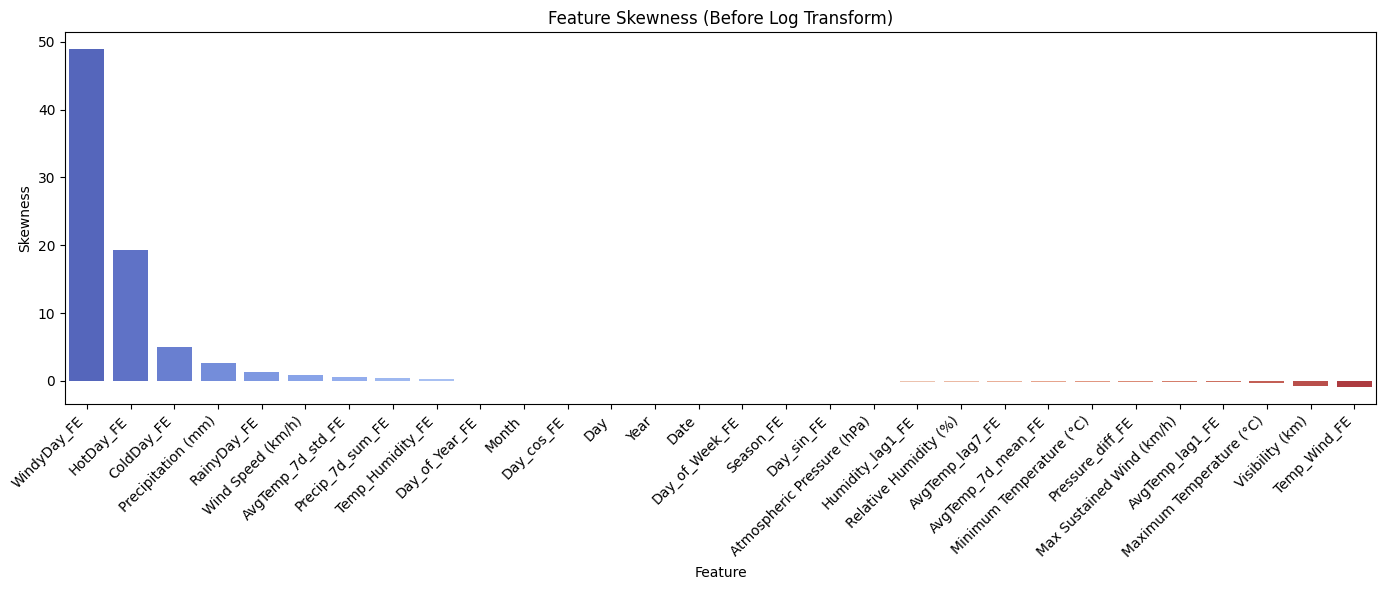

In [4]:

import numpy as np  # <-- add this
import matplotlib.pyplot as plt
import seaborn as sns

target = 'Average Temperature (°C)'

# Exclude target column only
feature_cols = df.drop(columns=[target]).columns

# Compute skewness
skewness = df[feature_cols].skew().sort_values(ascending=False)

# Create DataFrame for easy visualization
skew_df = pd.DataFrame({
    'Feature': skewness.index,
    'Skewness': skewness.values,
    'HighlySkewed': np.abs(skewness.values) > 1
})

skew_df

# %%
plt.figure(figsize=(14,6))
sns.barplot(x='Feature', y='Skewness', data=skew_df, palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Skewness")
plt.title("Feature Skewness (Before Log Transform)")
plt.tight_layout()
plt.show()


                           DataType  MissingRatio   Skewness  HighlySkewed
WindyDay_FE                 float64           0.0  48.911480          True
HotDay_FE                   float64           0.0  19.370389          True
ColdDay_FE                  float64           0.0   5.010592          True
Precipitation (mm)          float64           0.0   2.571595          True
RainyDay_FE                 float64           0.0   1.253927          True
Wind Speed (km/h)           float64           0.0   0.915660         False
AvgTemp_7d_std_FE           float64           0.0   0.528118         False
Precip_7d_sum_FE            float64           0.0   0.470659         False
Temp_Humidity_FE            float64           0.0   0.232795         False
Day_of_Year_FE                int64           0.0   0.026078         False
Month                         int64           0.0   0.016779         False
Day_cos_FE                  float64           0.0   0.014040         False
Day                      

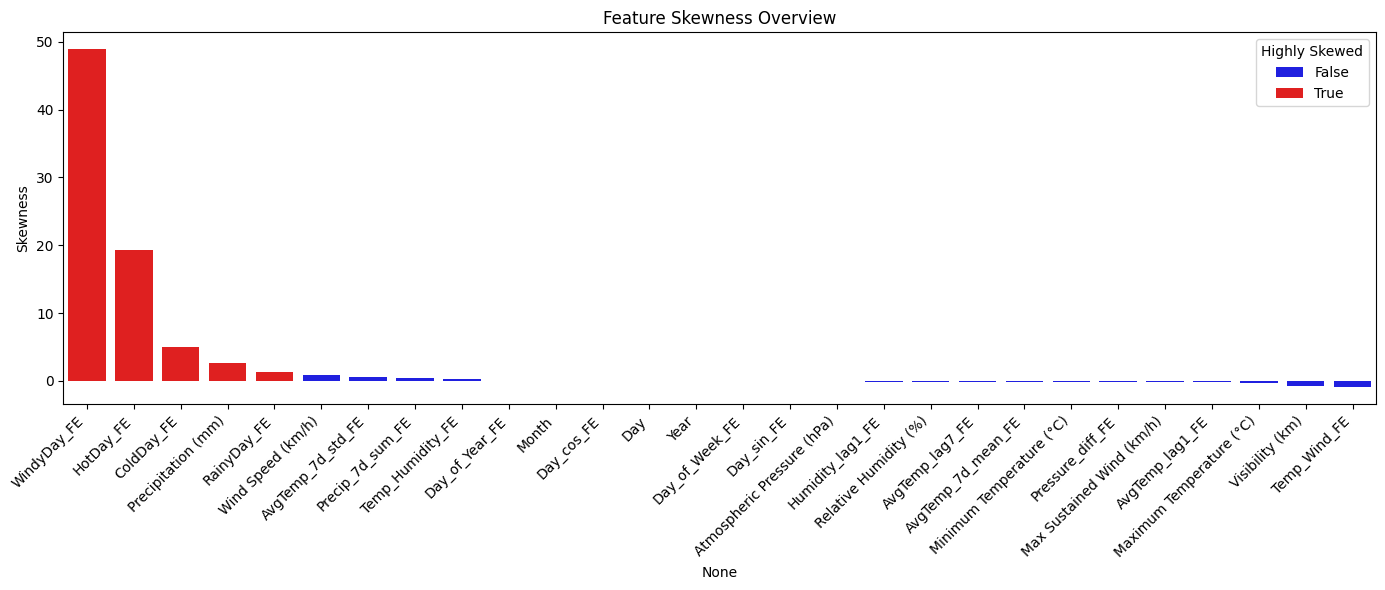

In [5]:
# Target column
target = 'Average Temperature (°C)'

# Select numeric features (exclude target, Date, Season_FE)
feature_cols = df.drop(columns=[target, 'Date', 'Season_FE']).select_dtypes(include=['float64', 'int64']).columns

# Compute skewness
skewness = df[feature_cols].skew()

# Compute missing ratio
missing_ratio = df[feature_cols].isna().mean()

# Combine into a professional summary DataFrame
feature_info = pd.DataFrame({
    'DataType': df[feature_cols].dtypes,
    'MissingRatio': missing_ratio,
    'Skewness': skewness,
    'HighlySkewed': skewness.abs() > 1
}).sort_values(by='Skewness', ascending=False)

# Display summary table
print(feature_info)

# Plot skewness
plt.figure(figsize=(14,6))
sns.barplot(
    x=feature_info.index,
    y=feature_info['Skewness'],
    hue=feature_info['HighlySkewed'],
    dodge=False,
    palette={True:'red', False:'blue'}
)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Skewness")
plt.title("Feature Skewness Overview")
plt.legend(title='Highly Skewed')
plt.tight_layout()
plt.show()

In [6]:
# List of highly skewed features
high_skew_features = ['WindyDay_FE', 'HotDay_FE', 'ColdDay_FE', 'Precipitation (mm)', 'RainyDay_FE']

# Check unique values and counts
for col in high_skew_features:
    print(f"\nFeature: {col}")
    print(df[col].value_counts().sort_index())



Feature: WindyDay_FE
WindyDay_FE
0.693147    7180
1.098612       3
Name: count, dtype: int64

Feature: HotDay_FE
HotDay_FE
0.693147    7164
1.098612      19
Name: count, dtype: int64

Feature: ColdDay_FE
ColdDay_FE
0.693147    6927
1.098612     256
Name: count, dtype: int64

Feature: Precipitation (mm)
Precipitation (mm)
0.693147    5499
0.810930     115
0.920283     147
1.015231      42
1.105257     102
            ... 
5.262742       1
5.393309       1
5.537216       1
5.683069       1
5.774676       1
Name: count, Length: 239, dtype: int64

Feature: RainyDay_FE
RainyDay_FE
0.693147    5499
1.098612    1684
Name: count, dtype: int64


Series([], dtype: float64)


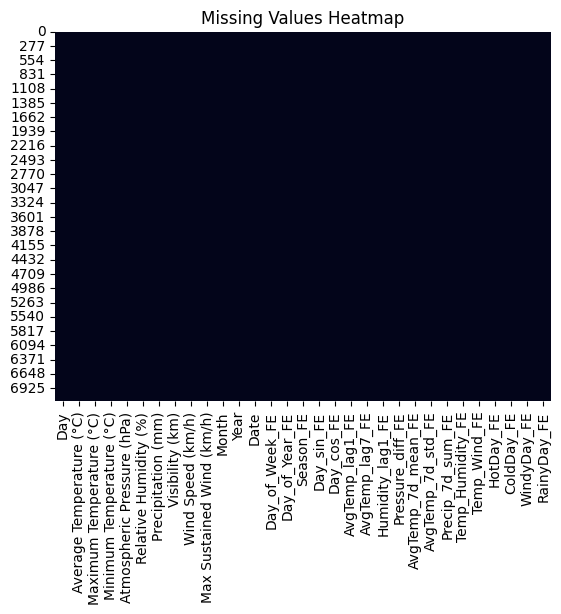

In [7]:
missing_ratio = df.isna().mean()
print(missing_ratio[missing_ratio > 0])
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

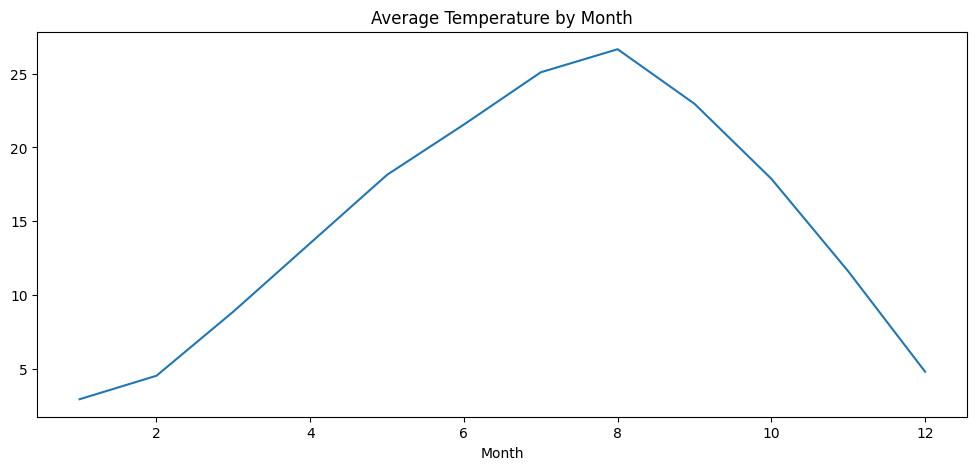

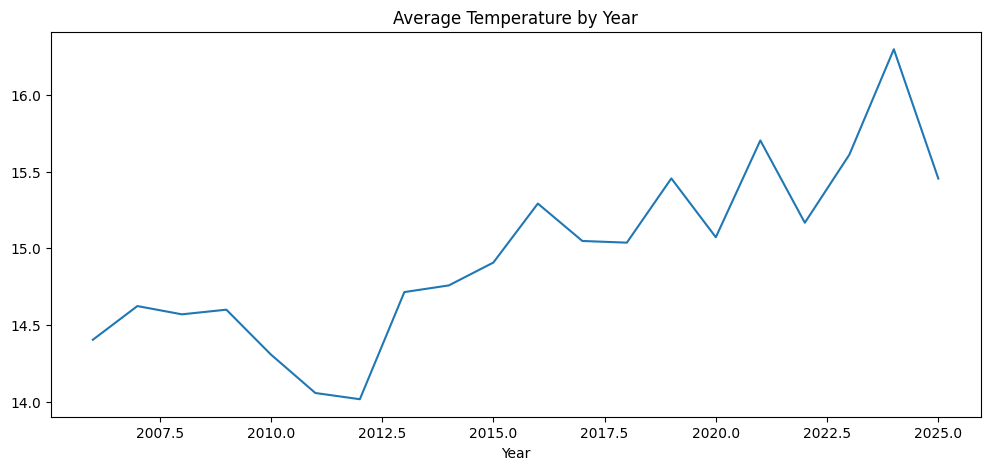

In [8]:

monthly_avg = df.groupby('Month')['Average Temperature (°C)'].mean()
yearly_avg = df.groupby('Year')['Average Temperature (°C)'].mean()

plt.figure(figsize=(12,5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title("Average Temperature by Month")
plt.show()

plt.figure(figsize=(12,5))
sns.lineplot(x=yearly_avg.index, y=yearly_avg.values)
plt.title("Average Temperature by Year")
plt.show()


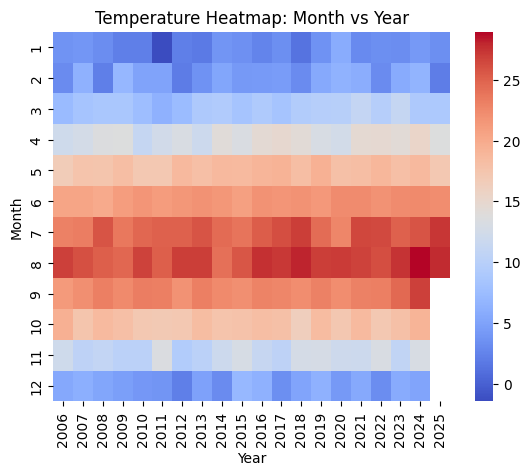

In [9]:
seasonal_pivot = df.pivot_table(index='Month', columns='Year', values='Average Temperature (°C)')
sns.heatmap(seasonal_pivot, cmap='coolwarm')
plt.title("Temperature Heatmap: Month vs Year")
plt.show()


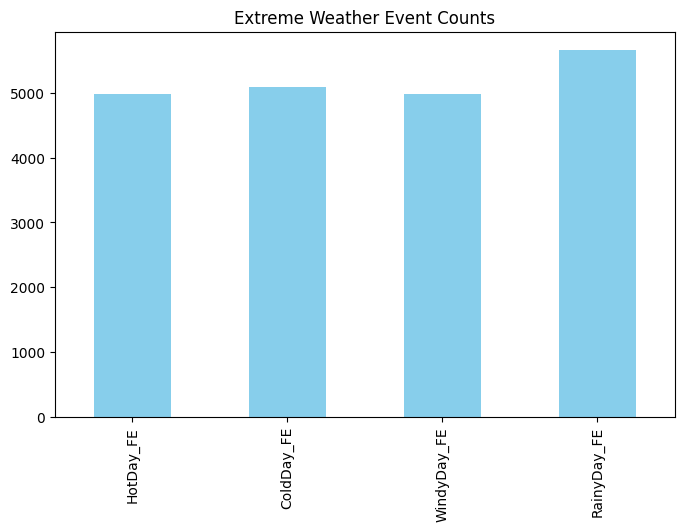

In [10]:
extreme_counts = df[['HotDay_FE','ColdDay_FE','WindyDay_FE','RainyDay_FE']].sum()
extreme_counts.plot(kind='bar', figsize=(8,5), color='skyblue')
plt.title("Extreme Weather Event Counts")
plt.show()


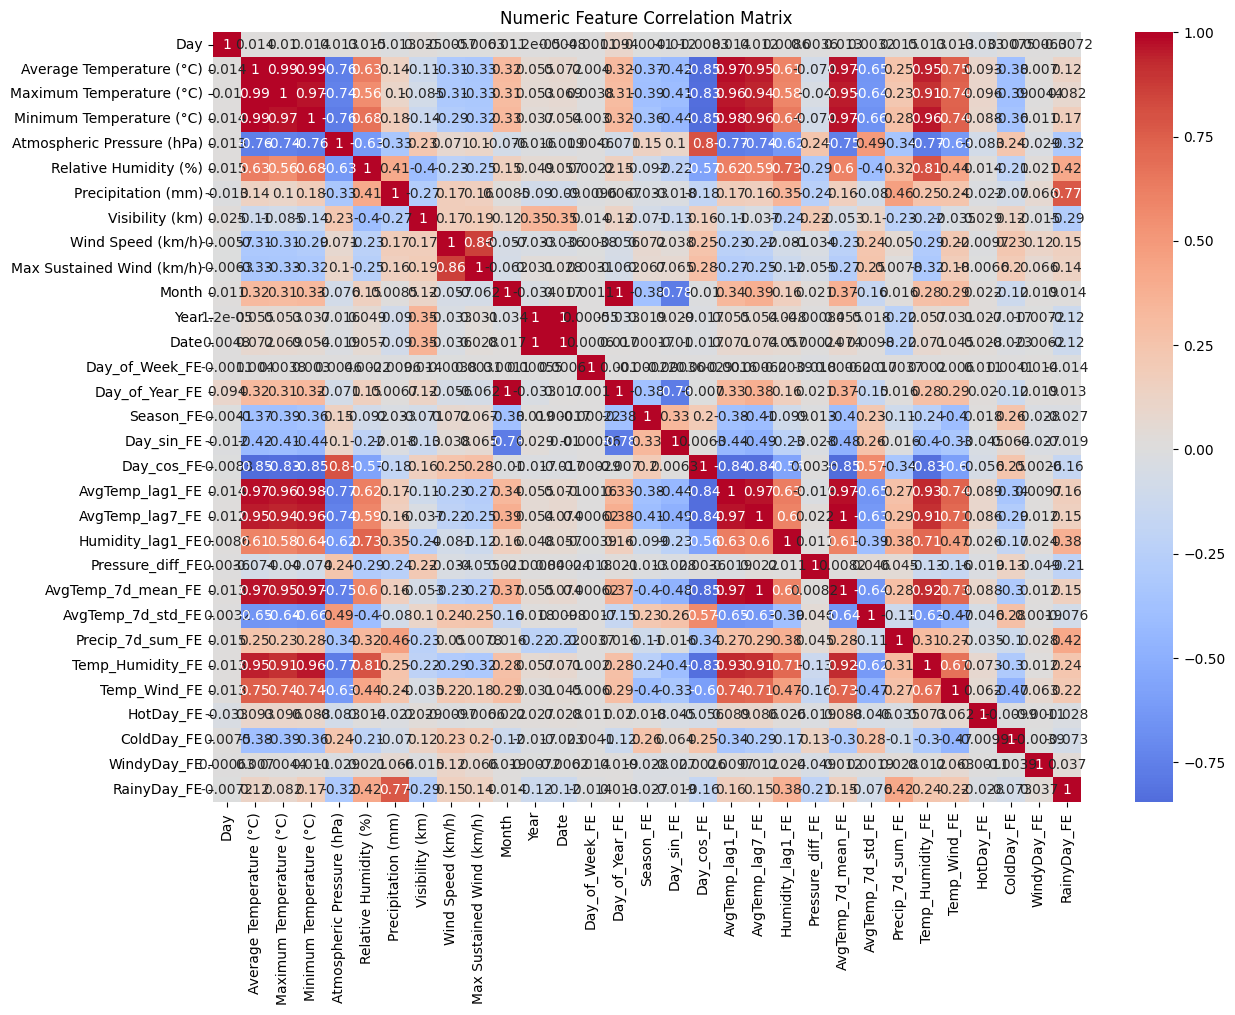

Average Temperature (°C)      1.000000
Minimum Temperature (°C)      0.988944
Maximum Temperature (°C)      0.987913
AvgTemp_lag1_FE               0.971256
AvgTemp_7d_mean_FE            0.965761
AvgTemp_lag7_FE               0.952261
Temp_Humidity_FE              0.945757
Temp_Wind_FE                  0.749243
Relative Humidity (%)         0.628395
Humidity_lag1_FE              0.609578
Month                         0.321863
Day_of_Year_FE                0.319088
Precip_7d_sum_FE              0.254979
Precipitation (mm)            0.138230
RainyDay_FE                   0.124508
HotDay_FE                     0.093307
Date                          0.071609
Year                          0.055425
Day                           0.013914
WindyDay_FE                   0.006991
Day_of_Week_FE                0.003997
Pressure_diff_FE             -0.073946
Visibility (km)              -0.113203
Wind Speed (km/h)            -0.313977
Max Sustained Wind (km/h)    -0.331069
Season_FE                

In [11]:


# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Numeric Feature Correlation Matrix")
plt.show()

# Focus on correlation with Avg Temp
print(corr['Average Temperature (°C)'].sort_values(ascending=False))


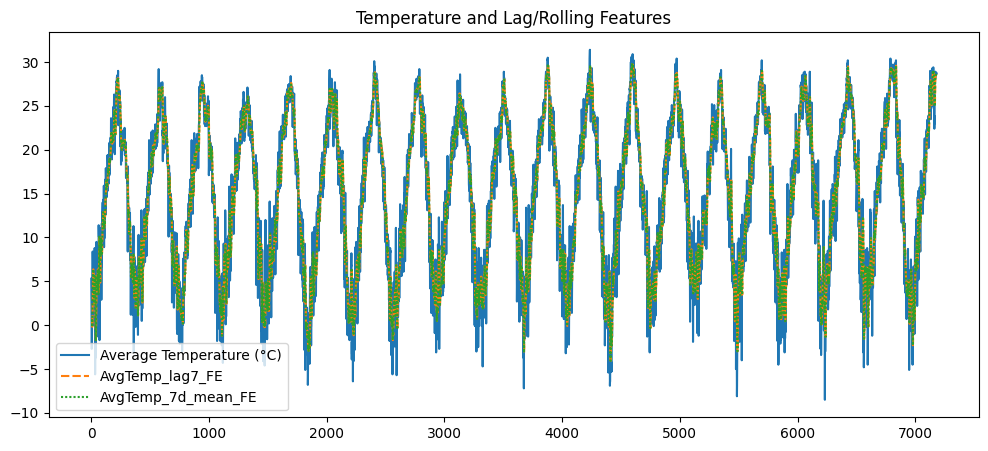

In [12]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df[['Average Temperature (°C)', 'AvgTemp_lag7_FE', 'AvgTemp_7d_mean_FE']])
plt.title("Temperature and Lag/Rolling Features")
plt.show()


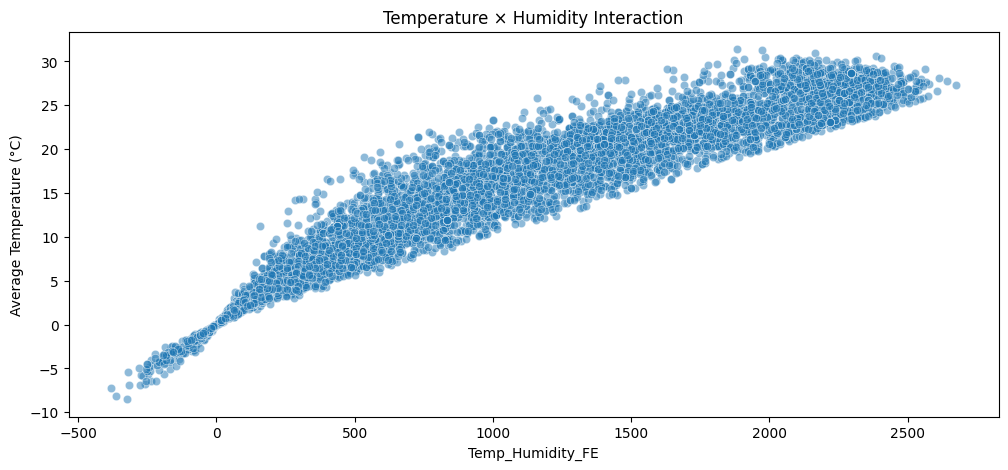

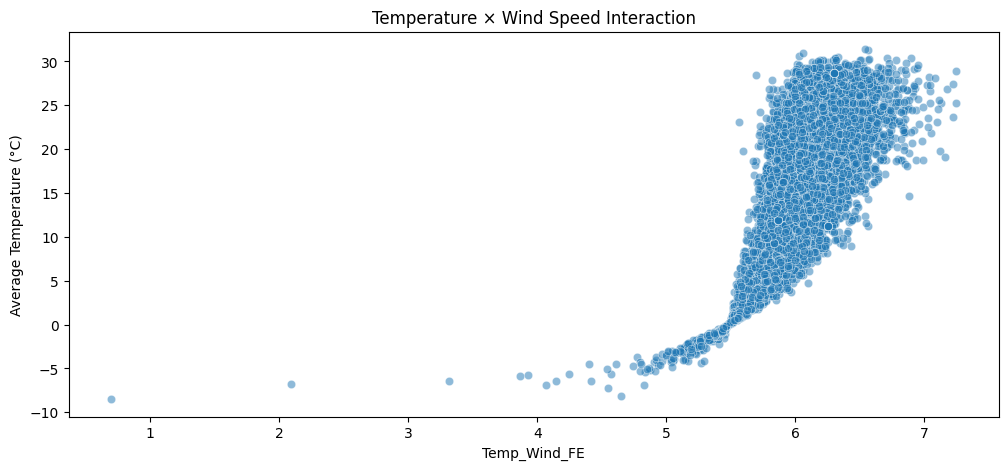

In [13]:


# Scatterplot for Temp × Humidity interaction
plt.figure(figsize=(12,5))
sns.scatterplot(data=df, x='Temp_Humidity_FE', y='Average Temperature (°C)', alpha=0.5)
plt.title("Temperature × Humidity Interaction")
plt.show()

# Scatterplot for Temp × Wind Speed interaction
plt.figure(figsize=(12,5))
sns.scatterplot(data=df, x='Temp_Wind_FE', y='Average Temperature (°C)', alpha=0.5)
plt.title("Temperature × Wind Speed Interaction")
plt.show()
